<a href="https://colab.research.google.com/github/Aakash-FMML20210811/Project_LID-Data/blob/main/Language_Identification_DataSet_from_Txt_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_url='https://raw.githubusercontent.com/Aakash-FMML20210811/Project_LID-Data/main/Language%20Detection.csv'
df=pd.read_csv(data_url)
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


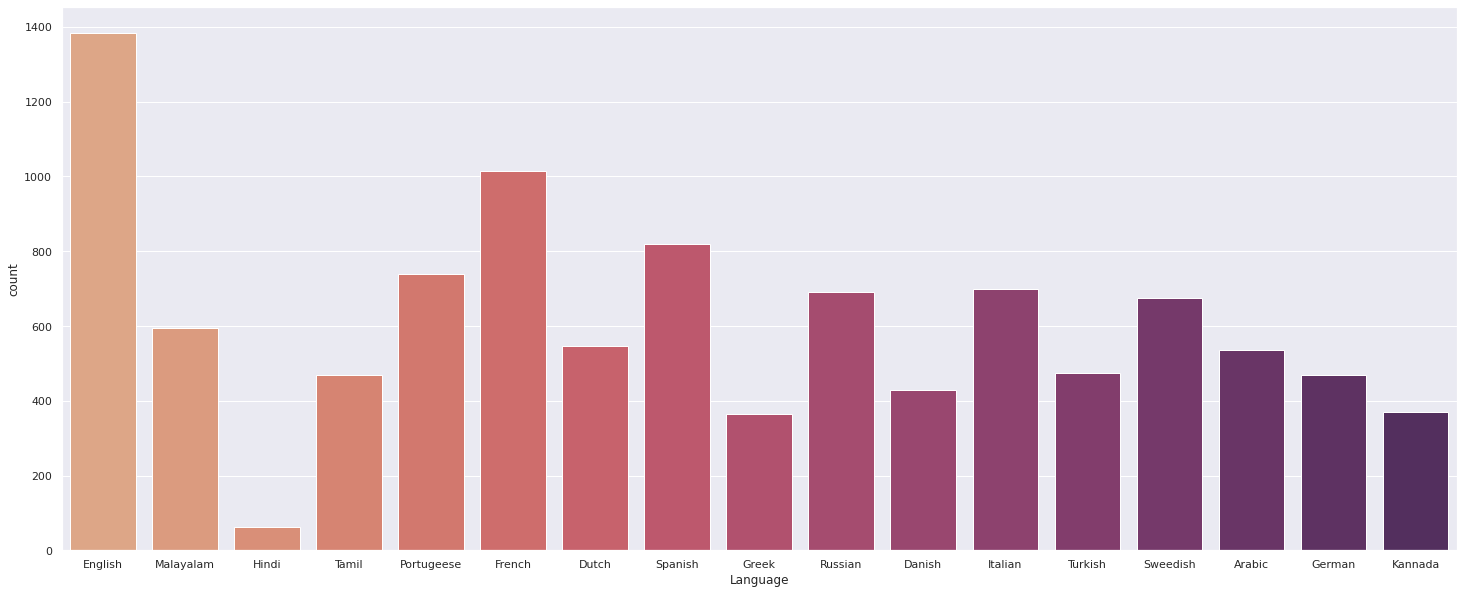

In [3]:
sns.set_theme(style='darkgrid')
fig=plt.figure(figsize=(25,10))
fig=sns.countplot(x='Language',data=df,palette="flare")

Our dataset contains equal amount of observation for each class.This embraces a model with data equality and remove impartial training of any specific language.

We are using a technique named Word Embedding to found language ID correspoding to written text.

In [4]:
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [5]:
X,Y=df['Text'],df['Language']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_trans=le.fit_transform(Y)

In [6]:
#Pre-processing Text:
import re
word_list=[]
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case
    word_list.append(text)

In [7]:
# Using Bag of Words Technique Vectorizing each sentence.
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(ngram_range=(1,1))
X_trans=vect.fit_transform(word_list).toarray()
X_trans.shape

(10337, 34937)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trans,
                                                    Y_trans,
                                                    test_size = 0.15,
                                                    shuffle = True,stratify=Y_trans)

In [9]:
Y_train

array([14,  3,  9, ...,  8, 16,  8])

In [10]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()
model_nb.fit(X_train,Y_train)

MultinomialNB()

In [11]:
y_pred=model_nb.predict(X_test)

In [17]:
Y_test_ln=le.inverse_transform(Y_test)
Y_pred_ln=le.inverse_transform(y_pred)

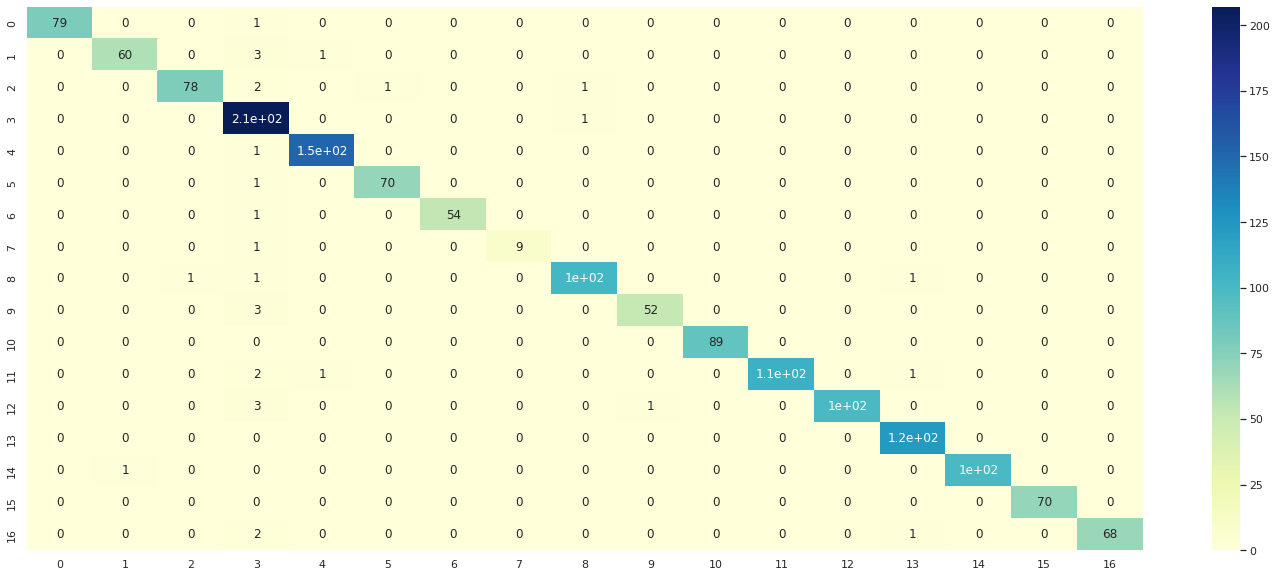

In [20]:
from sklearn.metrics import confusion_matrix
sns.set_theme(style='darkgrid')
fig_1=plt.figure(figsize=(25,10))
fig_1=sns.heatmap(confusion_matrix(Y_test_ln,Y_pred_ln),cmap="YlGnBu",annot=True)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_ln,Y_pred_ln))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      0.99        80
      Danish       0.98      0.94      0.96        64
       Dutch       0.99      0.95      0.97        82
     English       0.91      1.00      0.95       208
      French       0.99      0.99      0.99       152
      German       0.99      0.99      0.99        71
       Greek       1.00      0.98      0.99        55
       Hindi       1.00      0.90      0.95        10
     Italian       0.98      0.97      0.98       105
     Kannada       0.98      0.95      0.96        55
   Malayalam       1.00      1.00      1.00        89
  Portugeese       1.00      0.96      0.98       111
     Russian       1.00      0.96      0.98       104
     Spanish       0.98      1.00      0.99       123
    Sweedish       1.00      0.99      1.00       101
       Tamil       1.00      1.00      1.00        70
     Turkish       1.00      0.96      0.98        71

    accuracy              

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy of Model is: ",accuracy_score(Y_test_ln,Y_pred_ln)*100)
print("Precision of Model is: ",precision_score(Y_test_ln,Y_pred_ln,average='weighted')*100)
print("Recall of Model is: ",recall_score(Y_test_ln,Y_pred_ln,average='weighted')*100)
print("F1-score of Model is: ",f1_score(Y_test_ln,Y_pred_ln,average='weighted')*100)

Accuracy of Model is:  97.93681495809156
Precision of Model is:  98.05173978725408
Recall of Model is:  97.93681495809156
F1-score of Model is:  97.95146180986691


In [43]:
def predict(text):
  x = vect.transform([text]).toarray()
  lang = model_nb.predict(x)
  lang = le.inverse_transform(lang)
  print("The langauge is in",lang[0])